# Import Required Libraries 

In [1]:
!pip install matplotlib
!pip install statsmodels

In [2]:
from pathlib import Path
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from dateutil.parser import parse 
from matplotlib.pyplot import cm
from scipy import signal
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.graph_objects as go

import os
import warnings 
import datetime


import warnings
warnings.filterwarnings('ignore')

# Loading Data and other details

In [3]:
csvs = Path("/home/dmacs/Documents/Pranav_Phanindra/Data_Scraping_Final/Data_Part_2/Collated/CSVs")

DataFiles = os.listdir(csvs)

DataFiles

['13_Soyabean.csv',
 '263_Bengal+Gram+Dal+(Chana+Dal).csv',
 '1_Wheat.csv',
 '4_Maize.csv',
 '29_Barley+(Jau).csv',
 '12_Mustard.csv']

# Analysis on CropData Dataset and Its Summarised Dataset


In [4]:
CropData = pd.read_csv(csvs / '12_Mustard.csv' , parse_dates = ['Price Date'])
CropData = CropData.iloc[:,1:]

CropData['Price Date'] =  pd.to_datetime(CropData['Price Date'] )
CropData['Yr-mon'] = CropData['Price Date'].dt.strftime('%Y%m')


CropData.set_index('Price Date')

District Name  Market Name Commodity   Variety    Grade  \
Price Date                                                           
2009-02-20      Kurnool        Adoni   Mustard     Other      FAQ    
2013-05-03      Kurnool         Alur   Mustard     Other   Medium    
2013-03-25      Kurnool         Alur   Mustard   Mustard   Medium    
2013-03-25      Kurnool         Alur   Mustard     Other   Medium    
2012-04-22      Kurnool         Alur   Mustard   Mustard   Medium    
...                  ...          ...       ...       ...      ...   
2016-06-05   Coochbehar   Toofanganj   Mustard   Mustard      FAQ    
2016-06-04   Coochbehar   Toofanganj   Mustard   Mustard      FAQ    
2016-06-03   Coochbehar   Toofanganj   Mustard   Mustard      FAQ    
2016-06-02   Coochbehar   Toofanganj   Mustard   Mustard      FAQ    
2016-06-01   Coochbehar   Toofanganj   Mustard   Mustard      FAQ    

            Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
Price Date                                                     
2009-02-20                   1550.0                   1600.0   
2013-05-03                   2918.0                   2918.0   
2013-03-25                   3018.0                   3018.0   
2013-03-25                   3018.0                   3018.0   
2012-04-22                   2598.0                   2598.0   
...                             ...                      ...   
2016-06-05                   4300.0                   4500.0   
2016-06-04                   4300.0                   4500.0   
2016-06-03                   4300.0                   4500.0   
2016-06-02                   4300.0                   4500.0   
2016-06-01                   4300.0                   4500.0   

            Modal Price (Rs./Quintal)           State  Yr-mon  
Price Date                                                     
2009-02-20                     1575.0  Andhra Pradesh  200902  
2013-05-03                     2918.0  Andhra Pradesh  201305  
2013-03-25                     3018.0  Andhra Pradesh  201303  
2013-03-25                     3018.0  Andhra Pradesh  201303  
2012-04-22                     2598.0  Andhra Pradesh  201204  
...                               ...             ...     ...  
2016-06-05                     4400.0     West Bengal  201606  
2016-06-04                     4400.0     West Bengal  201606  
2016-06-03                     4400.0     West Bengal  201606  
2016-06-02                     4400.0     West Bengal  201606  
2016-06-01                     4400.0     West Bengal  201606  

[1014648 rows x 10 columns]

In [5]:
CropData.isnull().sum()

District Name                0
Market Name                  0
Commodity                    0
Variety                      0
Grade                        0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Price Date                   0
State                        0
Yr-mon                       0
dtype: int64

In [6]:
CropData.describe()

CropData.dtypes



District Name                        object
Market Name                          object
Commodity                            object
Variety                              object
Grade                                object
Min Price (Rs./Quintal)             float64
Max Price (Rs./Quintal)             float64
Modal Price (Rs./Quintal)           float64
Price Date                   datetime64[ns]
State                                object
Yr-mon                               object
dtype: object

In [7]:
CropData_Summarized = CropData.groupby(['Yr-mon'],as_index = False).mean()
CropData_Summarized['Yr-mon'] = pd.to_datetime(CropData_Summarized['Yr-mon'], format = '%Y%m')
CropData_Summarized

Yr-mon  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0   2008-04-01              1972.009636              2205.367174   
1   2008-05-01              2064.281171              2281.468051   
2   2008-06-01              2275.346497              2465.060944   
3   2008-07-01              2256.718133              2478.504936   
4   2008-08-01              2326.431642              2486.026648   
..         ...                      ...                      ...   
163 2021-11-01              7147.131780              7425.545886   
164 2021-12-01              6895.516610              7190.095399   
165 2022-01-01              6612.206225              6959.096469   
166 2022-02-01              6275.087460              6867.760500   
167 2022-03-01              6079.680151              6590.310789   

     Modal Price (Rs./Quintal)  
0                  2245.057074  
1                  2334.040883  
2                  2572.880386  
3                  2598.776824  
4                  2595.234415  
..                         ...  
163                7324.340586  
164                7096.493960  
165                6847.179651  
166                6640.370247  
167                6384.374227  

[168 rows x 4 columns]

In [8]:
CropData_Summarized.dtypes

Yr-mon                       datetime64[ns]
Min Price (Rs./Quintal)             float64
Max Price (Rs./Quintal)             float64
Modal Price (Rs./Quintal)           float64
dtype: object

### Plotting The Data

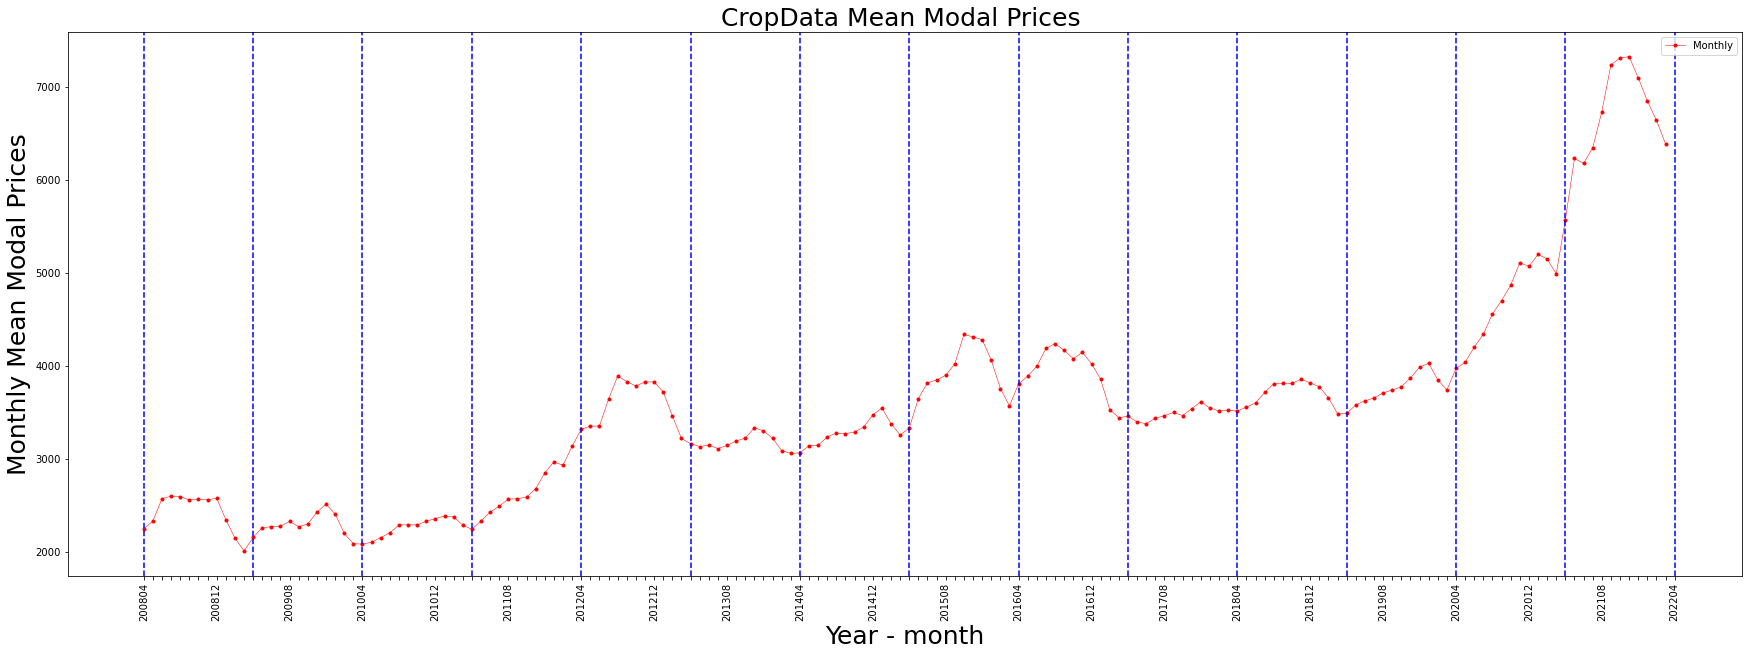

In [9]:
fig , ax = plt.subplots(figsize =  (30 , 10))
ax.plot(
    CropData_Summarized['Yr-mon'].dt.strftime('%Y%m'),
    CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'] ,
    marker = '.' , 
    linestyle = '-',
    linewidth = '0.5',
    label = 'Monthly',
    color = 'r'
)

plt.xlabel('Year - month', fontsize = 25)
plt.ylabel('Monthly Mean Modal Prices', fontsize = 25)
plt.title("CropData Mean Modal Prices " , fontsize = 25)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.locator_params(axis='x', nbins=10)
ax.autoscale()

"""
For setting no of labels in xaxis 
ax.xaxis.set_major_locator(plt.MaxNLocator(50))
"""

#Division for each financial year

xcoords = ['{}04'.format(i) for i in range(2008,2023)]
for xc in xcoords:
    plt.axvline(x=xc, color='b', linestyle='--')
    
    
every_nth = 8
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)


        
ax.legend()

### Analysis 

#### Additive Decomposition

###### Y[t] = T[t] + S[t] + e[t]

     Y[t]: Our time-series function
     T[t]: Trend (general tendency to move up or down)
     S[t]: Seasonality (cyclic pattern occurring at regular intervals)
     e[t]: Residual (random noise in the data that isn’t accounted for in the trend or seasonality

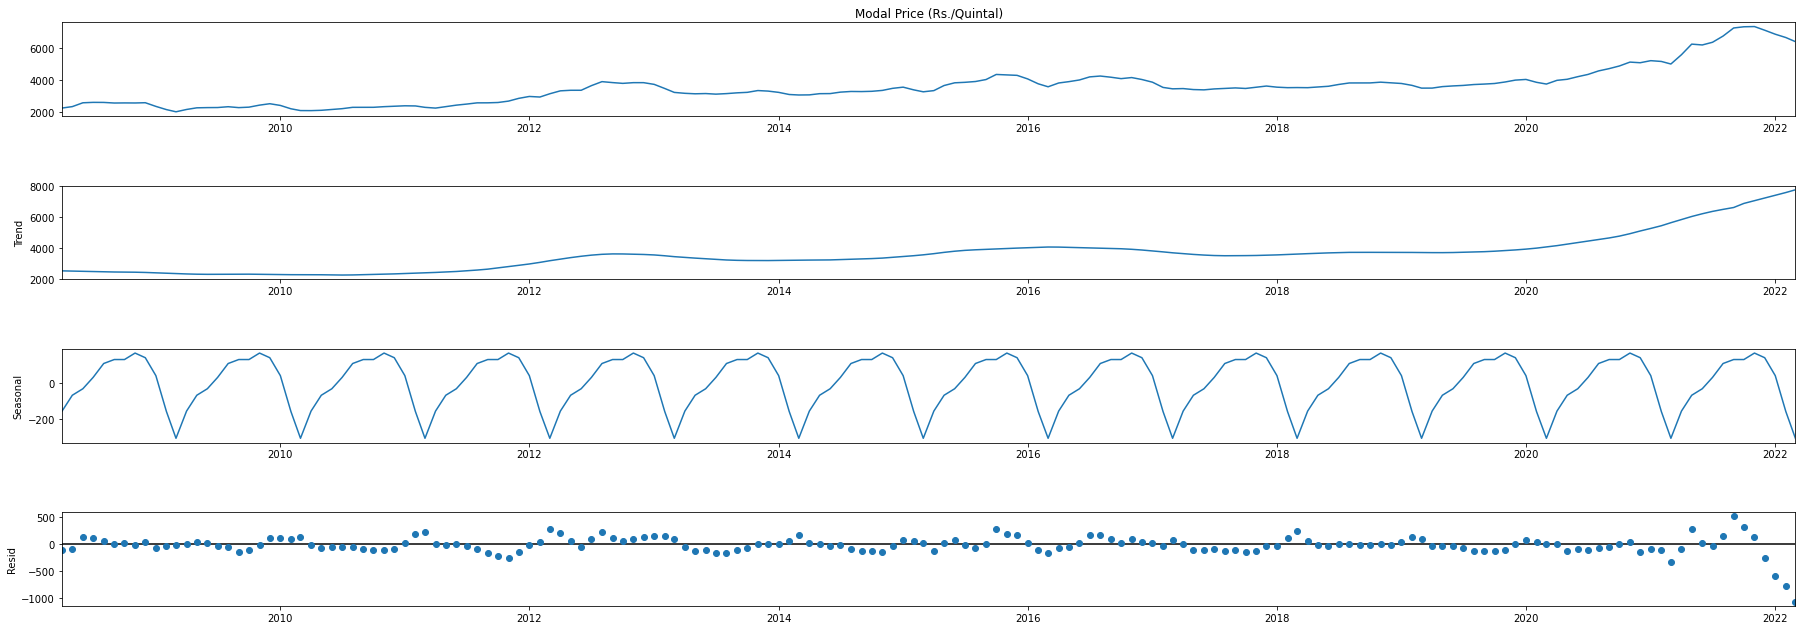

In [10]:
def seasonal_decompose_add(y):
     decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
     fig = decomposition.plot()
     fig.set_size_inches(30,10)
     plt.show()

seasonal_decompose_add(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'])

#### Multiplicative

##### Y[t] = T[t] *S[t] *e[t]

##### The amplitude of our seasonality becomes larger or smaller based on the trend. 

        

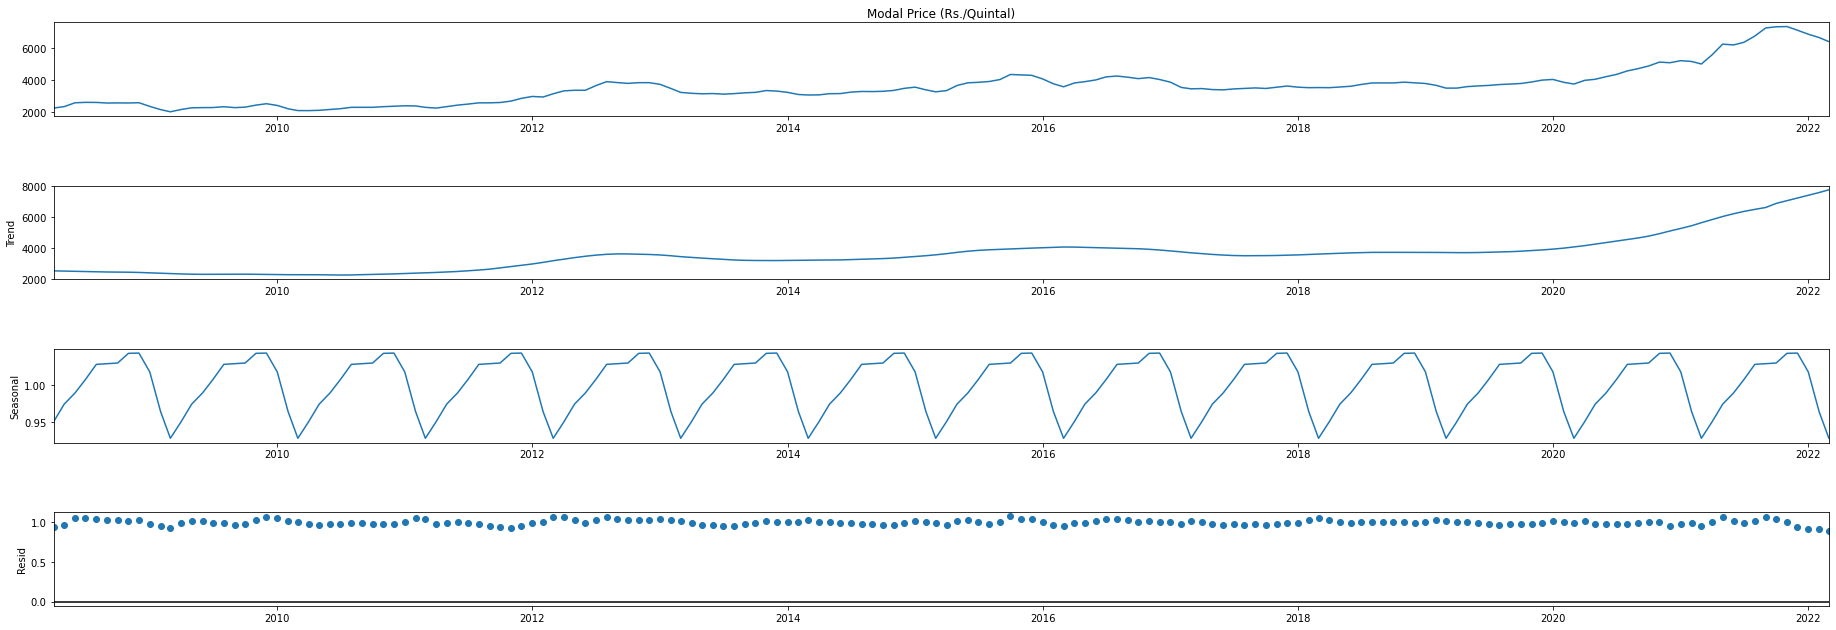

In [11]:
def seasonal_decompose_mul(y):
     decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative',extrapolate_trend='freq')
     fig = decomposition.plot()
     fig.set_size_inches(30,10)
     plt.show()

seasonal_decompose_mul(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'])

In [12]:
CropData_Summarized['Year'] = CropData_Summarized.set_index('Yr-mon').index.year

CropData_Summarized['Month'] = CropData_Summarized.set_index('Yr-mon').index.month

"""import datetime
mydate = datetime.datetime.now()
mydate.strftime("%B")

CropData_Summarized['Month_name'] =  CropData_Summarized.set_index('Yr-mon').index.strftime('%B')
"""


CropData_Summarized

Yr-mon  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0   2008-04-01              1972.009636              2205.367174   
1   2008-05-01              2064.281171              2281.468051   
2   2008-06-01              2275.346497              2465.060944   
3   2008-07-01              2256.718133              2478.504936   
4   2008-08-01              2326.431642              2486.026648   
..         ...                      ...                      ...   
163 2021-11-01              7147.131780              7425.545886   
164 2021-12-01              6895.516610              7190.095399   
165 2022-01-01              6612.206225              6959.096469   
166 2022-02-01              6275.087460              6867.760500   
167 2022-03-01              6079.680151              6590.310789   

     Modal Price (Rs./Quintal)  Year  Month  
0                  2245.057074  2008      4  
1                  2334.040883  2008      5  
2                  2572.880386  2008      6  
3                  2598.776824  2008      7  
4                  2595.234415  2008      8  
..                         ...   ...    ...  
163                7324.340586  2021     11  
164                7096.493960  2021     12  
165                6847.179651  2022      1  
166                6640.370247  2022      2  
167                6384.374227  2022      3  

[168 rows x 6 columns]

In [13]:
years = CropData_Summarized['Year'].unique()
years

month = CropData_Summarized['Month'].unique()
month



array([ 4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3])



###### df2 = df[df["InsertedDates"].isin(pd.date_range("2021-11-15", "2021-11-17"))]


###### mask = (df['InsertedDates'] > start_date) & (df['InsertedDates'] <= end_date)
###### df2 = df.loc[mask]
###### print(df2)

###### Can use this code also for selecting a range of values

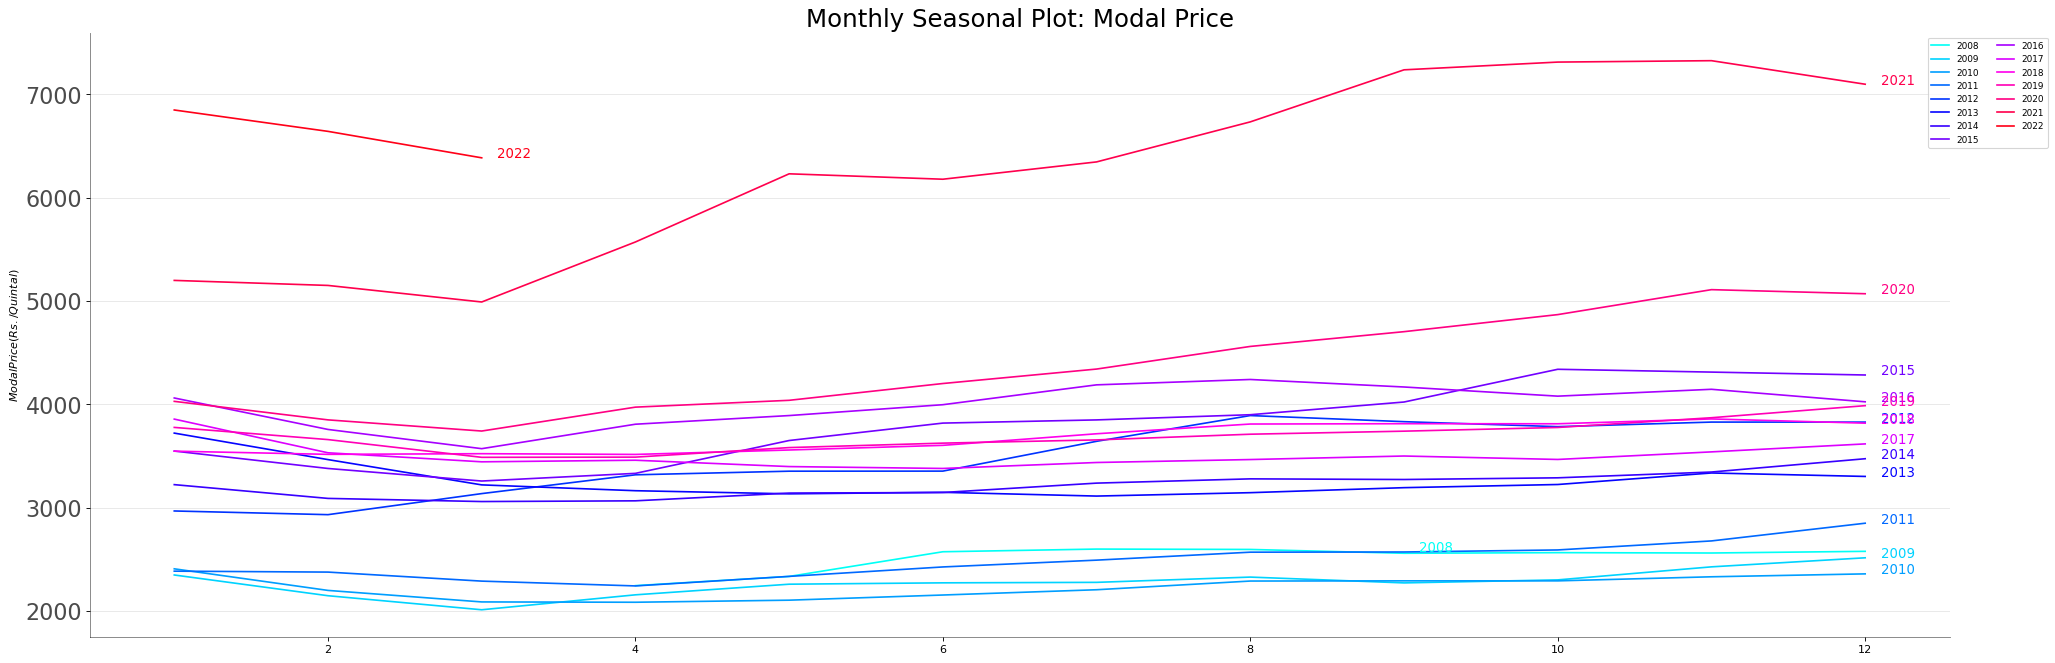

In [14]:

# Draw Plot
#rainbow(np.linspace(0.5, 1, 15))
#hsv(np.linspace(0.5, 1, 15))
mycolors = cm.hsv(np.linspace(0.5, 1, 15))
plt.figure(figsize=(30,10), dpi= 80)

for i, y in enumerate(years):
    plt.plot(
        'Month', 
        'Modal Price (Rs./Quintal)', 
        data = CropData_Summarized.loc[CropData_Summarized.Year == y, :], 
        color=mycolors[i], 
        label=y
    )
    plt.text(
        CropData_Summarized.loc[CropData_Summarized.Year==y, :].shape[0]+0.1, 
        CropData_Summarized.loc[CropData_Summarized.Year==y, 'Modal Price (Rs./Quintal)'][-1:].values[0] + 0.2, 
        y, 
        fontsize=12, 
        color=mycolors[i]
    )

    
# Decoration

plt.ylabel('$Modal Price (Rs./Quintal)$')
plt.yticks(fontsize=20, alpha=.7)
plt.title("Monthly Seasonal Plot: Modal Price", fontsize=22)
plt.grid(axis='y', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)   
plt.legend(loc=0, 
           ncol=2, 
           fontsize=8,
          bbox_to_anchor=(0.555, 0.5, 0.5, 0.5))
plt.show()

In [15]:
CropData_Summarized.dtypes

Yr-mon                       datetime64[ns]
Min Price (Rs./Quintal)             float64
Max Price (Rs./Quintal)             float64
Modal Price (Rs./Quintal)           float64
Year                                  int64
Month                                 int64
dtype: object

In [16]:

fig = px.line_polar(
    CropData_Summarized, r="Modal Price (Rs./Quintal)",
    color = "Year",
    theta =  CropData_Summarized.set_index('Yr-mon').index.strftime('%B'),
    line_close=False,
    color_discrete_sequence=px.colors.sequential.Plasma_r,
    template="plotly_dark"
   )
fig.show()

###### Autocorrelation 

###### The degree of resemblance between a certain time series and a lagged version of itself over subsequent time intervals is represented mathematically as autocorrelation

In [17]:

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

CropData_Summarized[CropData_Summarized['Modal Price (Rs./Quintal)'].shift(12).notnull()]

Yr-mon  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
12  2009-04-01              1834.209134              1974.845651   
13  2009-05-01              1956.036930              2055.618733   
14  2009-06-01              1963.290588              2057.305463   
15  2009-07-01              1902.349464              1994.891188   
16  2009-08-01              1882.710427              1972.661702   
..         ...                      ...                      ...   
163 2021-11-01              7147.131780              7425.545886   
164 2021-12-01              6895.516610              7190.095399   
165 2022-01-01              6612.206225              6959.096469   
166 2022-02-01              6275.087460              6867.760500   
167 2022-03-01              6079.680151              6590.310789   

     Modal Price (Rs./Quintal)  Year  Month  
12                 2156.120807  2009      4  
13                 2258.910047  2009      5  
14                 2272.102741  2009      6  
15                 2276.739715  2009      7  
16                 2327.703141  2009      8  
..                         ...   ...    ...  
163                7324.340586  2021     11  
164                7096.493960  2021     12  
165                6847.179651  2022      1  
166                6640.370247  2022      2  
167                6384.374227  2022      3  

[156 rows x 6 columns]

##### Lag Plots

###### Lag plots help us check whether a data set or a time series is random 
###### Random data donot exhibit any identifieable structure 

###### A lag is a fixed time displacement , would whether is  there any correlation in data and would help us find  a suitable model for the data and also helps us to find outliers


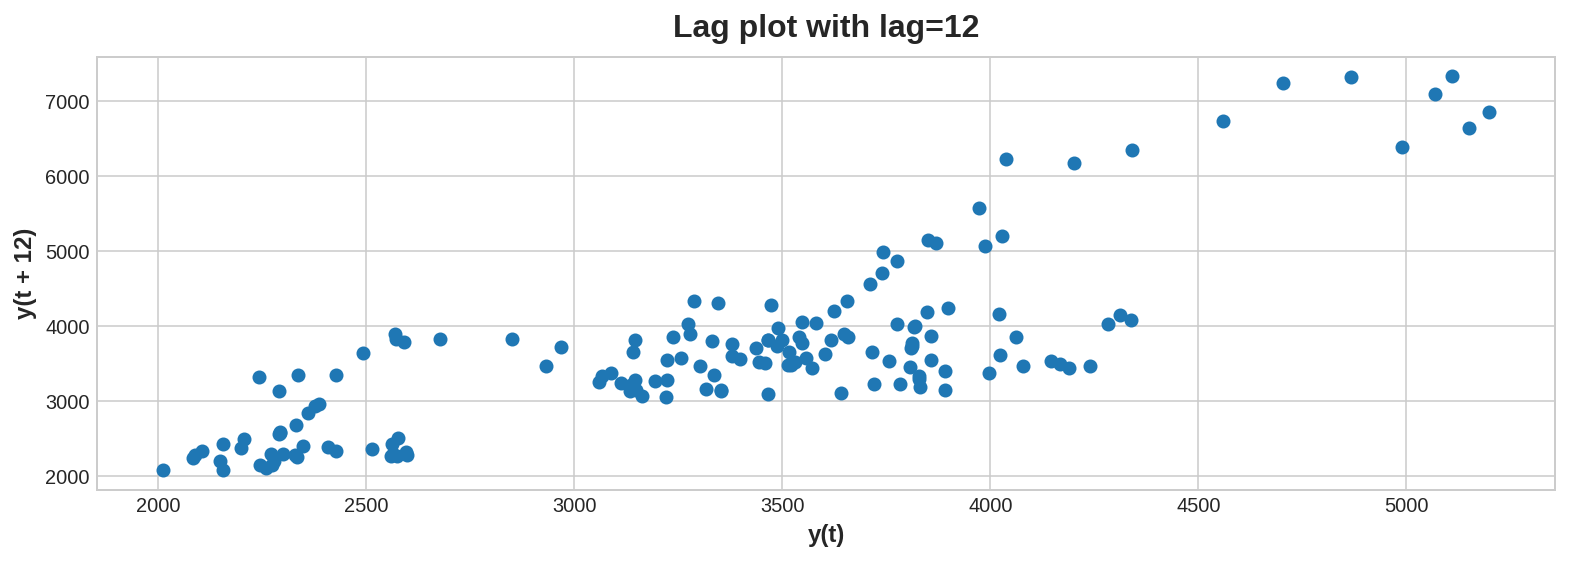

In [18]:

plt.title("Lag plot with lag=12")
pd.plotting.lag_plot(CropData_Summarized['Modal Price (Rs./Quintal)'] , lag = 12)
plt.show(block=True)

Text(0.5, 1.0, 'Lag Plot of Modal Price (Lag = 12)')

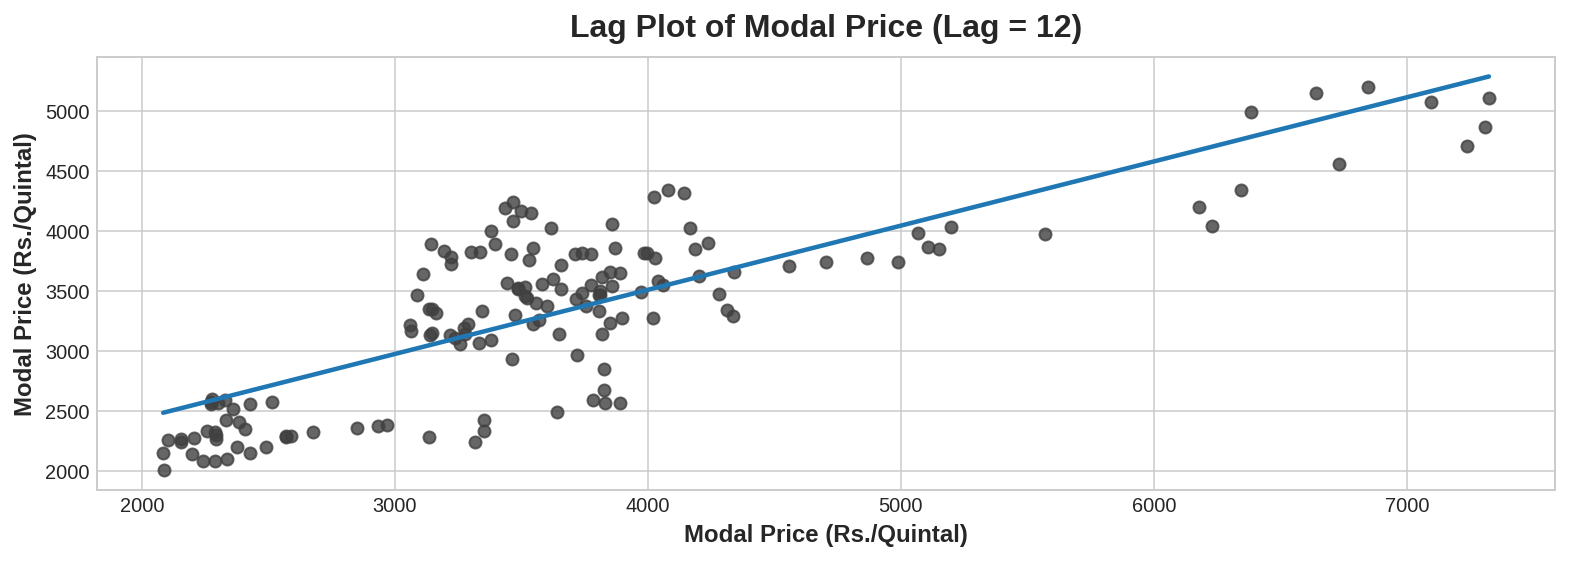

In [19]:
fig, ax = plt.subplots()

ax = sns.regplot(
    x= 'Modal Price (Rs./Quintal)', 
    y=CropData_Summarized['Modal Price (Rs./Quintal)'].shift(12), 
    data = CropData_Summarized, 
    ci=None,
    scatter_kws=dict(color='0.25')
)


#ax.set_aspect('equal')
ax.set_title('Lag Plot of Modal Price (Lag = 12)')

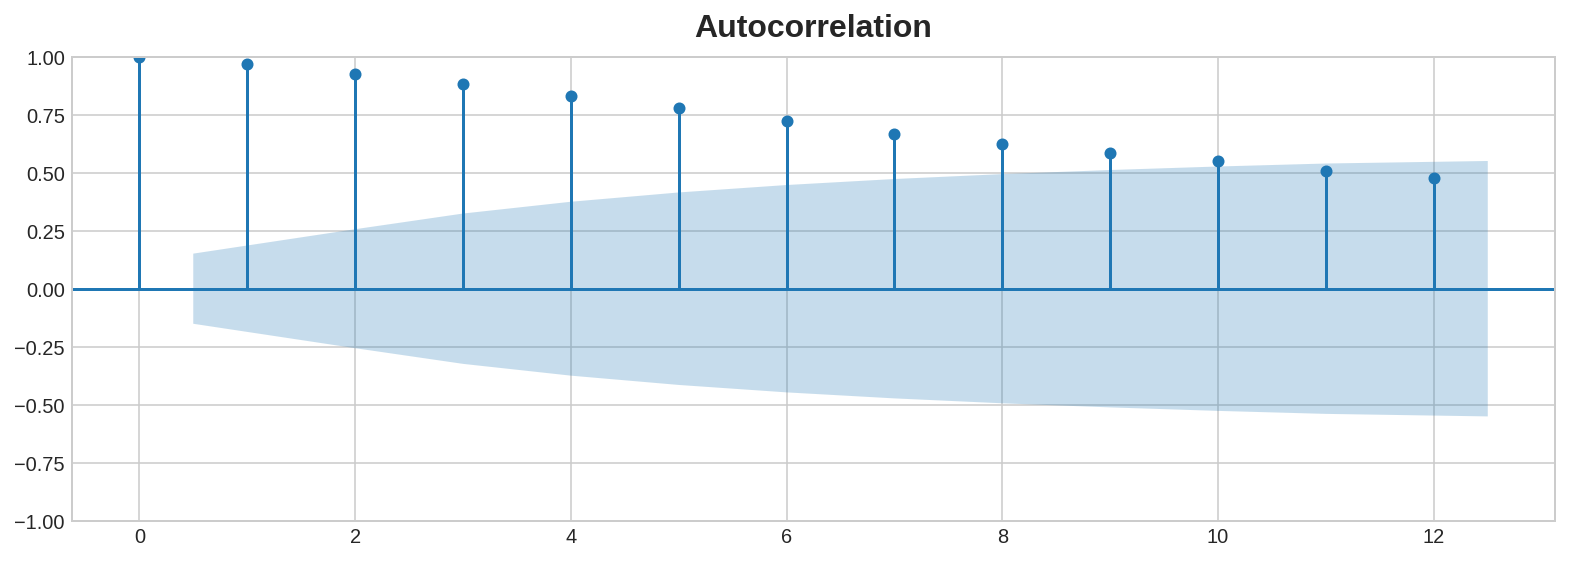

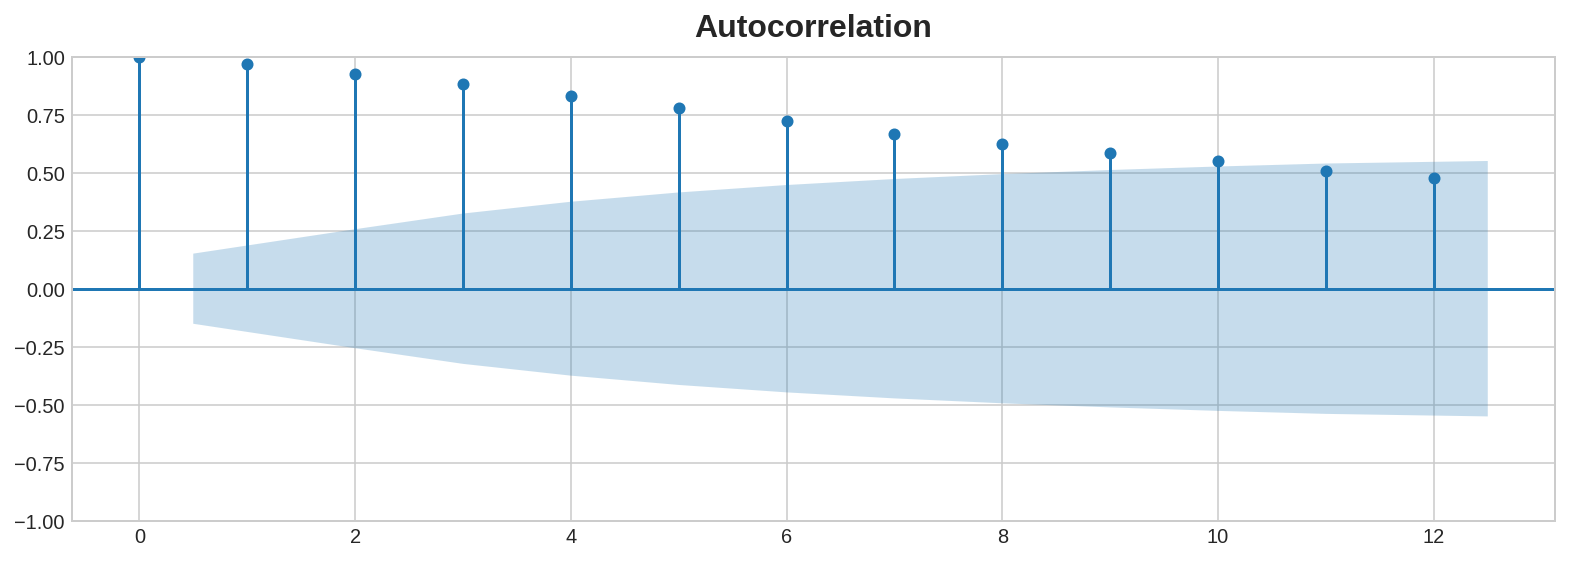

In [20]:
plot_acf(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'] ,lags = 12)

##### So for 95% confidence interval Significant correlation for lag 10 data but not lag 11 or 12 data or only from lag 11 data starts to become stationary

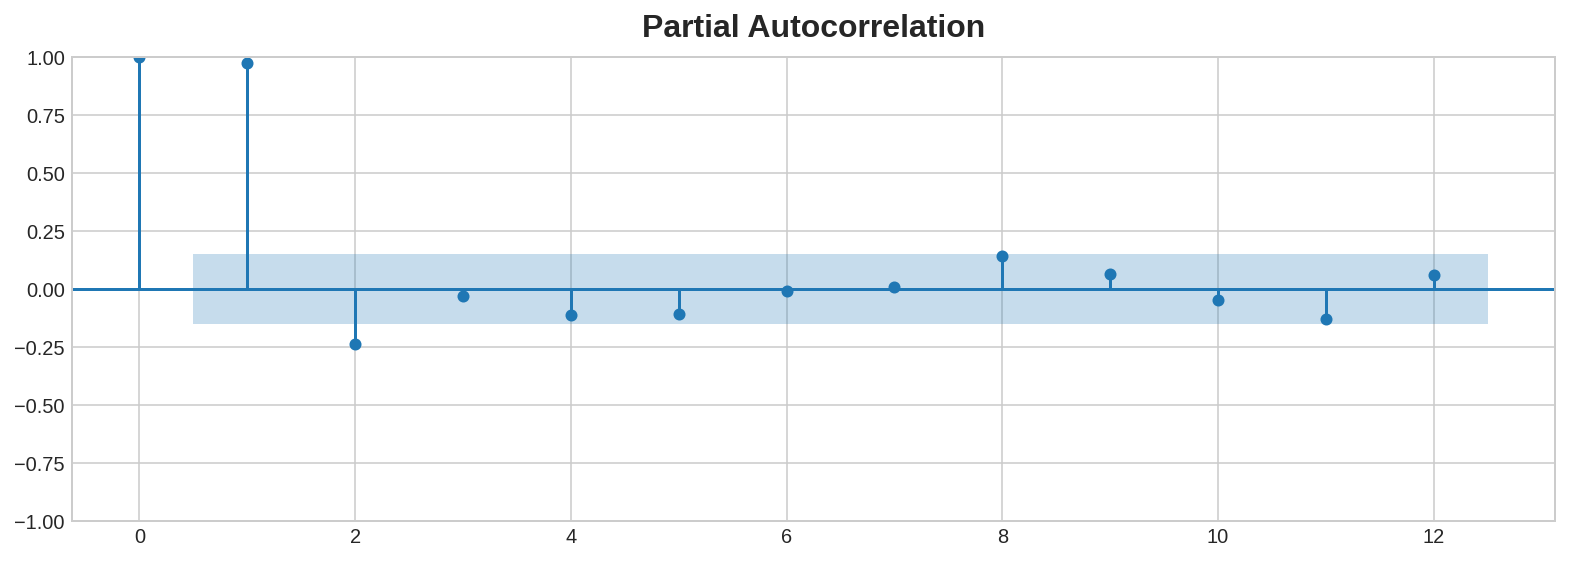

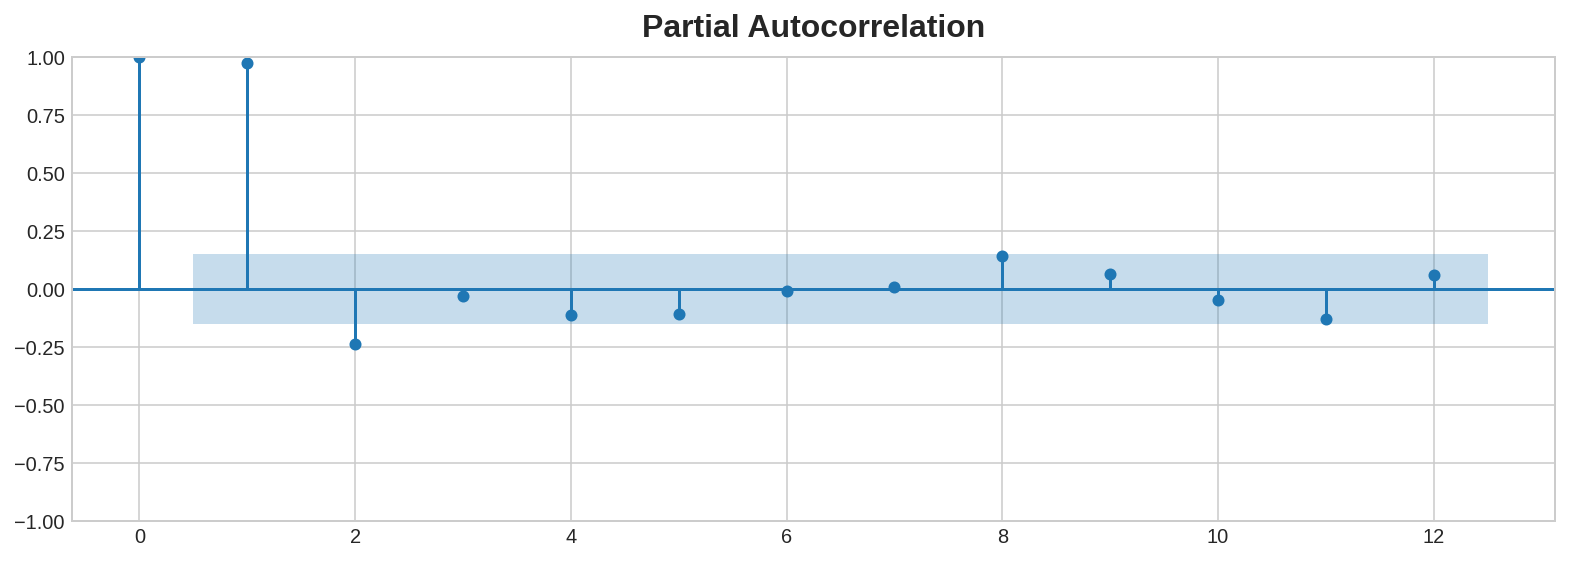

In [21]:
plot_pacf(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'],lags = 12)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

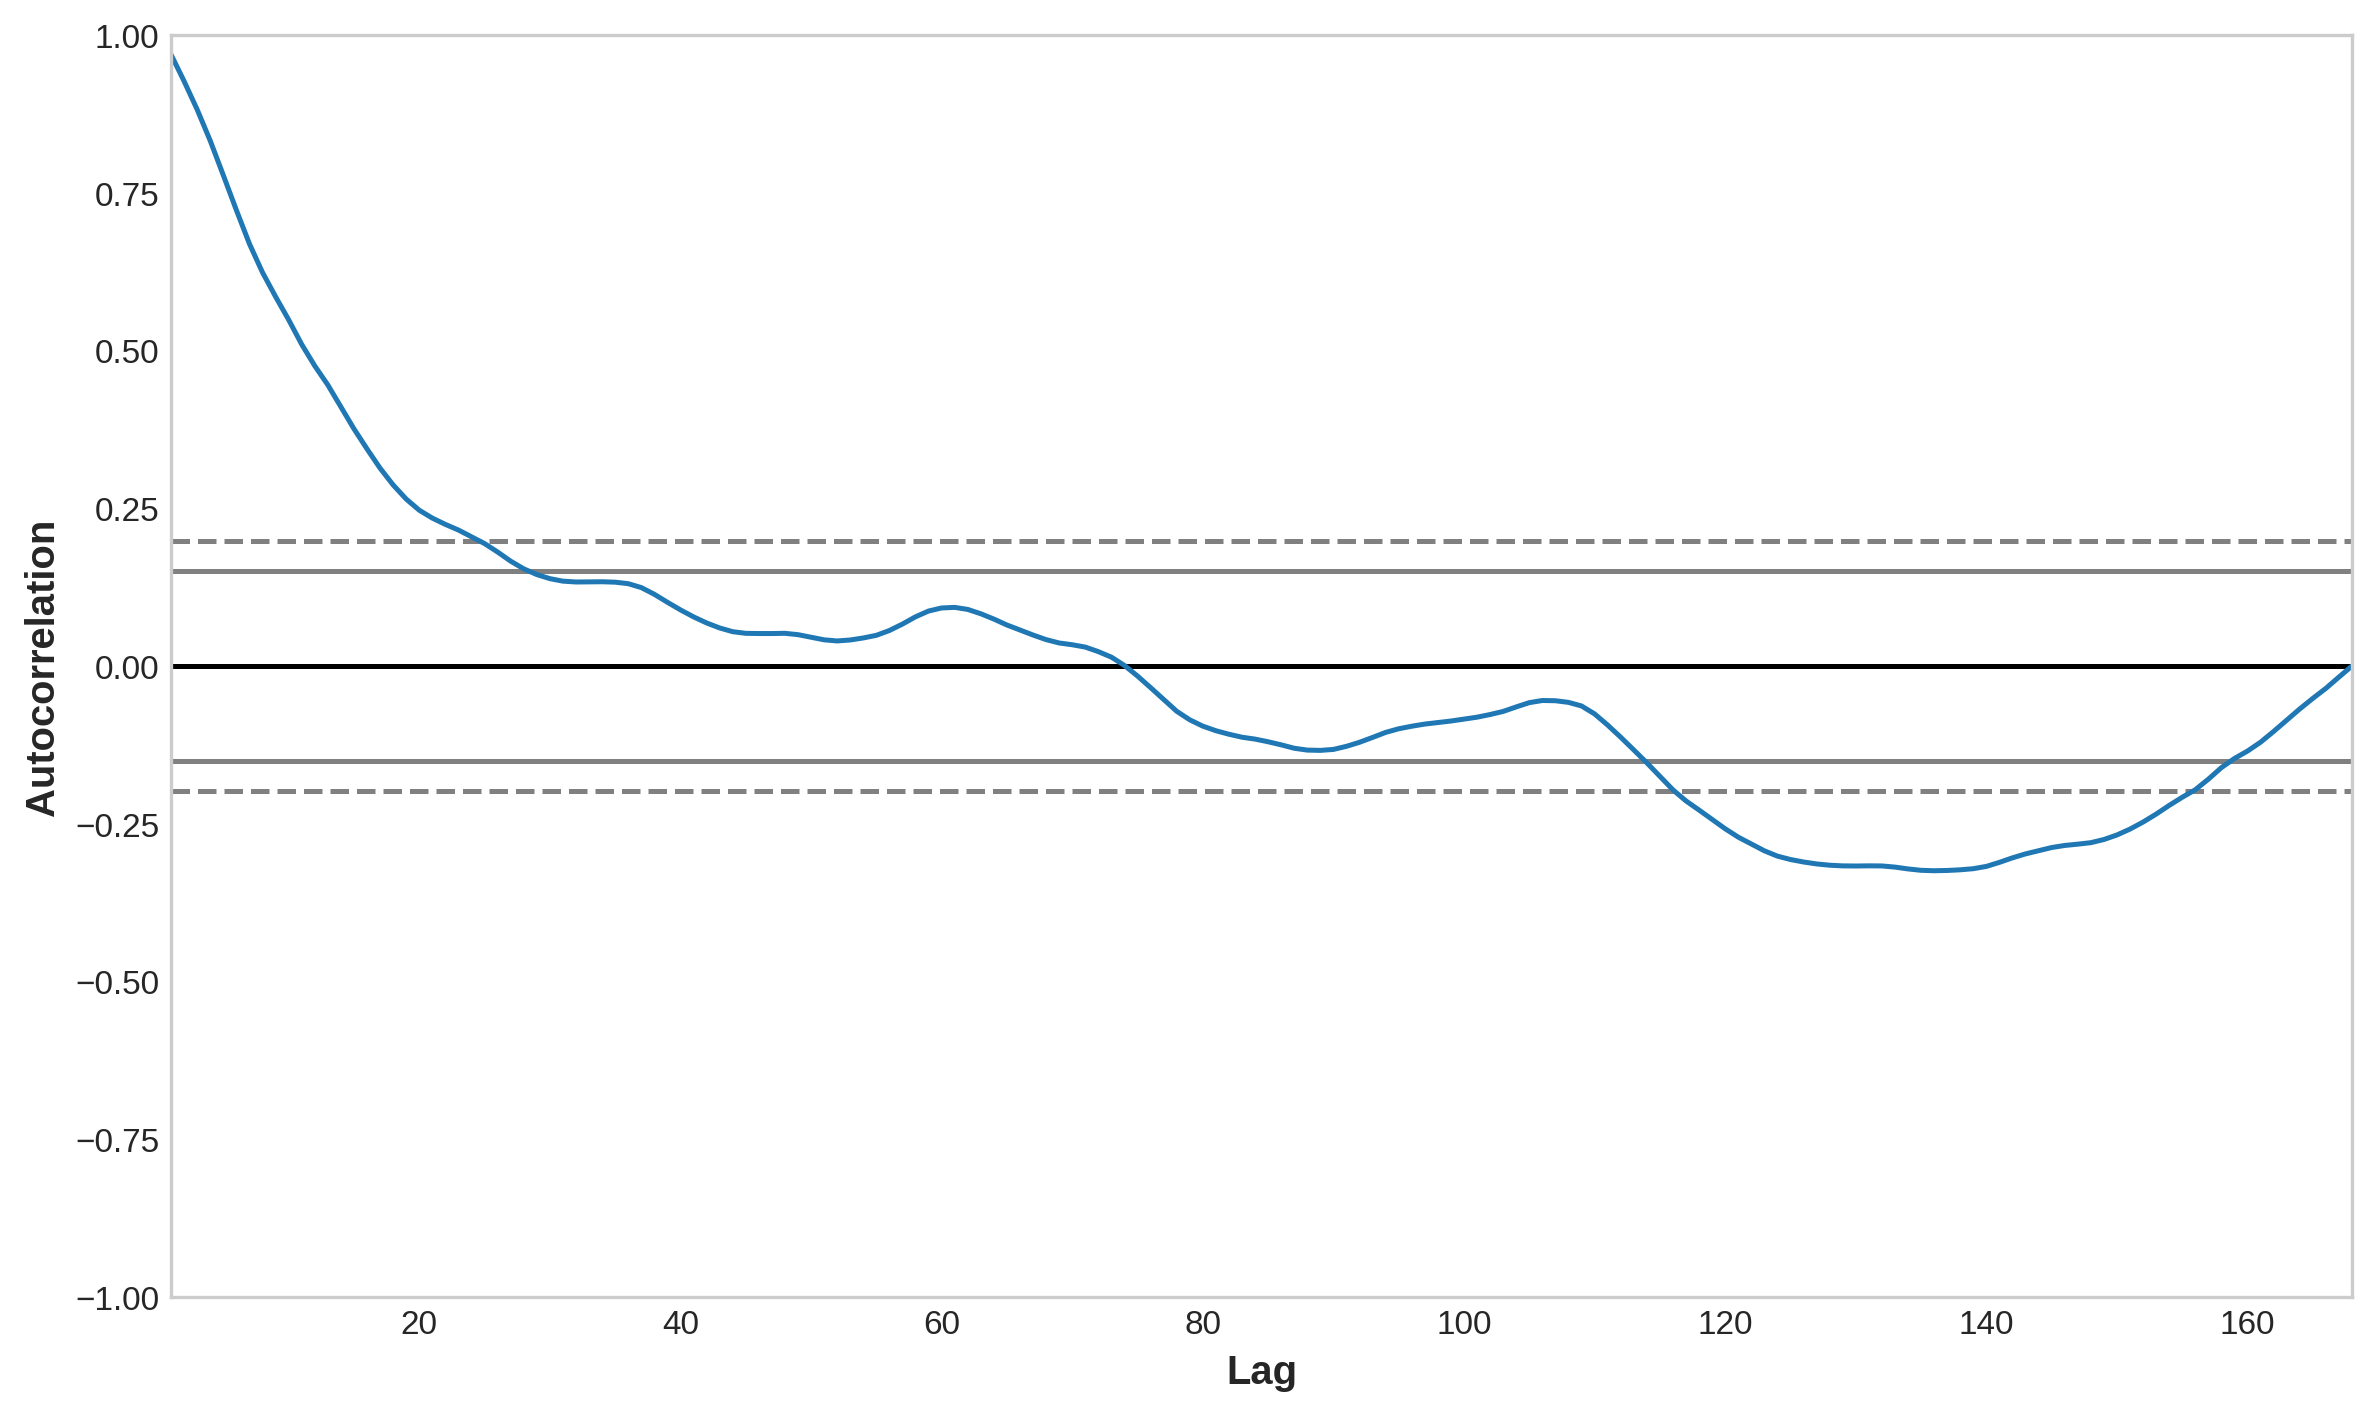

In [22]:
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'].tolist())

###### Here the relation is linear and since the plot implies that we have a linear realtionship the data could be in range of weak and moderate autocorrelation

##### Stationarity 

###### A stationary time series is one whose properties do not depend on the time at which the series is observed.14 Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. 


In [23]:
def test_stationarity(timeseries, title):
    
    """
    Determing rolling statistics
    Rolling mean , lag = 12
    Rolling Std deviation , lag = 12
    """
    
    
    rolmean = pd.Series(timeseries).rolling(window=12,center=True).mean()
    rolmean.index = pd.to_datetime(rolmean.index, format = '%Y-%m-%d')
    
    """
    print(rolmean[rolmean.index.year == 2008])
    print(rolmean.index)
    print(rolmean.index.dtype)
    print(rolmean.dtypes)
    print(rolmean)
    """
    

    rolstd = pd.Series(timeseries).rolling(window=12).std()
    rolstd.index = pd.to_datetime(rolstd.index, format = '%Y-%m-%d')
    
    """
    Printing Data
    print(rolstd.dtypes)
    print(rolstd)
    
    Plotting using matplotlib
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='Rolling mean')
    ax.plot(rolstd, label='Rolling std (x10)')
    ax.legend()
    
    
    Following is interactive plotting using PLotly 
    """
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=timeseries.index,
        y=timeseries,
        mode='lines' ,
        name = "Modal Price"
    ))
    
    fig.add_trace(go.Scatter(
        x=timeseries.index,
        y=rolmean,
        mode='lines' , #+markers
        name = "Rolling mean "
    ))

    fig.add_trace(go.Scatter(
        x=timeseries.index,
        y=rolstd,
        mode='lines' , #+markers
        name = "Rolling std (x10) "
    ))

    fig.show()    

In [24]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'],'CropData_Summarized')

###### Here  the mean and standard deviation are getting fluctuated since we can see that we are having the trends and seasonality certainly from the seasonal decomposition of the graphs above both in additive and multiplicative 

###### White noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time

##### Tests fot stationarity 

 #####   ->  Augmented Dicky Fuller Test (ADF)
    
 #####   ->  Kwiatkowski–Phillips–Schmidt–Shin (KPSS)

## ADF

In [25]:
def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print(dftest,'\n')
    print('Lag : {}'.format(dftest[2]))
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
    
    
    dftest = adfuller(timeseries.dropna(), maxlag =12 )
    print('\n' , dftest , '\n')
    print('Lag : {}'.format(dftest[2]))
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [26]:
ADF_test(
    CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'] ,
    'CropData_Summarised'
)

 > Is the CropData_Summarised stationary ?
(-0.535511457040433, 0.8848984155536058, 14, 153, {'1%': -3.473829775724492, '5%': -2.880622899711496, '10%': -2.5769448985432954}, 1910.0708295480404) 

Lag : 14
Test statistic = -0.536
P-value = 0.885
Critical values :
	1%: -3.473829775724492 - The data is not stationary with 99% confidence
	5%: -2.880622899711496 - The data is not stationary with 95% confidence
	10%: -2.5769448985432954 - The data is not stationary with 90% confidence

 (-0.9906650081995098, 0.7566537796605814, 12, 155, {'1%': -3.4732590518613002, '5%': -2.880374082105334, '10%': -2.5768120811654525}, 1936.7450744226574) 

Lag : 12
Test statistic = -0.991
P-value = 0.757
Critical values :
	1%: -3.4732590518613002 - The data is not stationary with 99% confidence
	5%: -2.880374082105334 - The data is not stationary with 95% confidence
	10%: -2.5768120811654525 - The data is not stationary with 90% confidence


## KPSS

In [27]:
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, nlags = 12 ,**kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')


In [28]:
kpss_test(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'])

KPSS Statistic: 1.0410880890059988
p-value: 0.01
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


In [29]:
kpss_test(
    CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'],
    regression='ct')

KPSS Statistic: 0.11705335560700446
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is stationary


###### So overall what this means to us is, if a series is stationary according to the KPSS test by setting regression='ct' and is not stationary according to the ADF test, it means the series is stationary around a deterministic trend and so is fairly easy to model this series and produce fairly accurate forecasts.

## Making non-stationary data to stationary data

### Detrending the data by removing the line of best fit or Regression line

In [30]:
CropData_Summarized['Detrended_Modal_Price'] = signal.detrend(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'])
CropData_Summarized

Yr-mon  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0   2008-04-01            1972.00963608            2205.36717374   
1   2008-05-01            2064.28117098            2281.46805096   
2   2008-06-01            2275.34649658            2465.06094360   
3   2008-07-01            2256.71813305            2478.50493562   
4   2008-08-01            2326.43164150            2486.02664823   
..         ...                      ...                      ...   
163 2021-11-01            7147.13177975            7425.54588575   
164 2021-12-01            6895.51661041            7190.09539883   
165 2022-01-01            6612.20622497            6959.09646888   
166 2022-02-01            6275.08746048            6867.76049977   
167 2022-03-01            6079.68015073            6590.31078909   

     Modal Price (Rs./Quintal)  Year  Month  Detrended_Modal_Price  
0                2245.05707396  2008      4           286.43939745  
1                2334.04088310  2008      5           356.25196684  
2                2572.88038574  2008      6           575.92022974  
3                2598.77682403  2008      7           582.64542828  
4                2595.23441471  2008      8           559.93177921  
..                         ...   ...    ...                    ...  
163              7324.34058569  2021     11          2240.81083053  
164              7096.49395985  2021     12          1993.79296495  
165              6847.17965053  2022      1          1725.30741588  
166              6640.37024688  2022      2          1499.32677248  
167              6384.37422698  2022      3          1224.15951283  

[168 rows x 7 columns]

In [31]:
test_stationarity(CropData_Summarized.set_index('Yr-mon')['Detrended_Modal_Price'] , 'Detrended Modal Prices')

###### ADF

In [32]:
ADF_test(
    CropData_Summarized.set_index('Yr-mon')['Detrended_Modal_Price'] ,
    'CropData_Summarised'
)

 > Is the CropData_Summarised stationary ?
(-2.9368270499269986, 0.0412300643788859, 14, 153, {'1%': -3.473829775724492, '5%': -2.880622899711496, '10%': -2.5769448985432954}, 1901.049561807291) 

Lag : 14
Test statistic = -2.937
P-value = 0.041
Critical values :
	1%: -3.473829775724492 - The data is not stationary with 99% confidence
	5%: -2.880622899711496 - The data is  stationary with 95% confidence
	10%: -2.5769448985432954 - The data is  stationary with 90% confidence

 (-3.613706823339039, 0.005504325237360324, 12, 155, {'1%': -3.4732590518613002, '5%': -2.880374082105334, '10%': -2.5768120811654525}, 1924.091081563612) 

Lag : 12
Test statistic = -3.614
P-value = 0.006
Critical values :
	1%: -3.4732590518613002 - The data is  stationary with 99% confidence
	5%: -2.880374082105334 - The data is  stationary with 95% confidence
	10%: -2.5768120811654525 - The data is  stationary with 90% confidence


###### KPSS without ct

In [33]:
kpss_test(CropData_Summarized.set_index('Yr-mon')['Detrended_Modal_Price'])

KPSS Statistic: 0.1170533556070038
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


###### KPSS with ct

In [34]:
kpss_test(
    CropData_Summarized.set_index('Yr-mon')['Detrended_Modal_Price'],
    regression='ct')

KPSS Statistic: 0.11705335560700392
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is stationary


So overall what this means to us is, if a series is stationary according to the KPSS test by setting regression='ct' and is not stationary according to the ADF test, it means the series is stationary around a deterministic trend and so is fairly easy to model this series and produce fairly accurate forecasts.

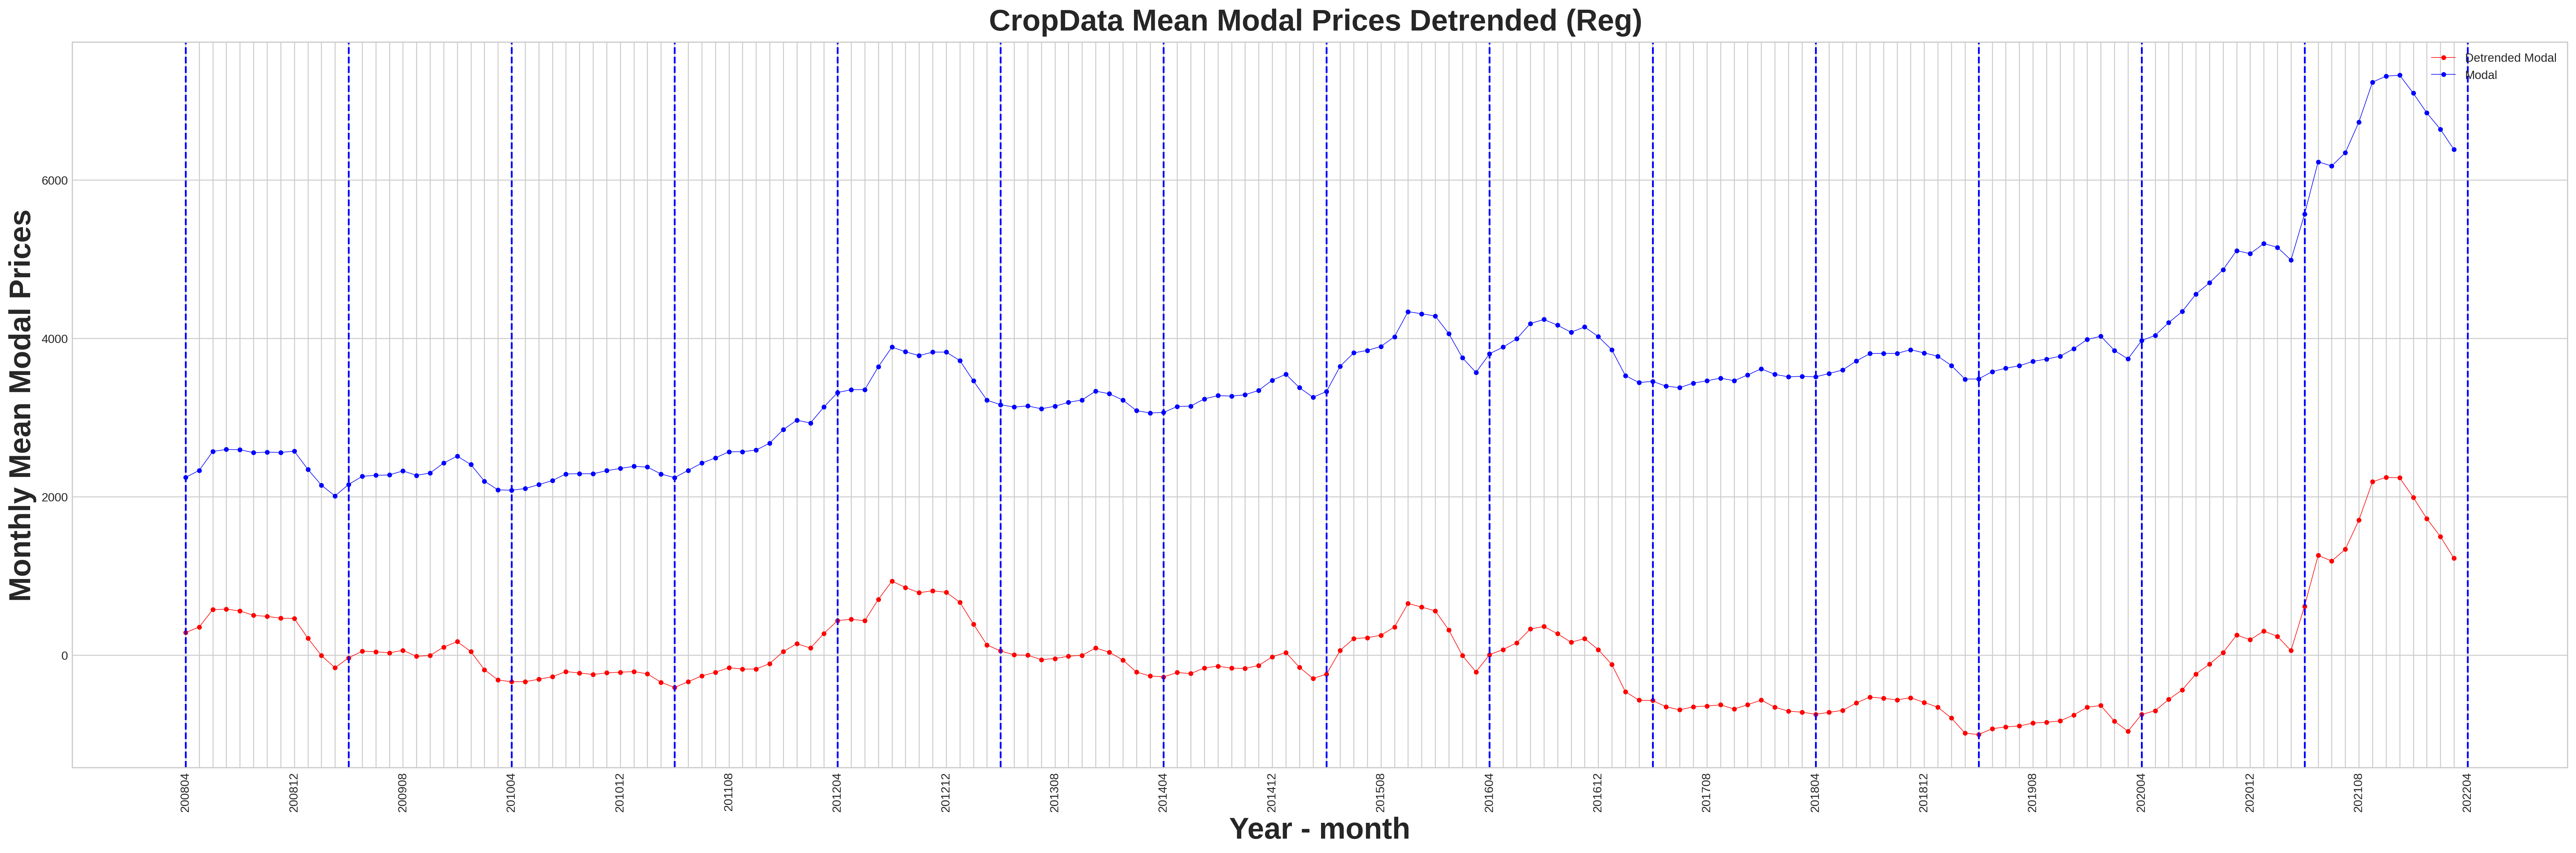

In [35]:
fig , ax = plt.subplots(figsize =  (30 , 10))
ax.plot(
    CropData_Summarized['Yr-mon'].dt.strftime('%Y%m'),
    CropData_Summarized['Detrended_Modal_Price'],
    marker = '.' , 
    linestyle = '-',
    linewidth = '0.5',
    label = 'Detrended Modal',
    color = 'r'
)
ax.plot(
    CropData_Summarized['Yr-mon'].dt.strftime('%Y%m'),
    CropData_Summarized['Modal Price (Rs./Quintal)'],
    marker = '.' , 
    linestyle = '-',
    linewidth = '0.5',
    label = 'Modal',
    color = 'b'
)

plt.xlabel('Year - month', fontsize = 25)
plt.ylabel('Monthly Mean Modal Prices', fontsize = 25)
plt.title("CropData Mean Modal Prices Detrended (Reg) " , fontsize = 25)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.locator_params(axis='x', nbins=10)
ax.autoscale()

"""
For setting no of labels in xaxis 
ax.xaxis.set_major_locator(plt.MaxNLocator(50))
"""

#Division for each financial year

xcoords = ['{}04'.format(i) for i in range(2008,2023)]
for xc in xcoords:
    plt.axvline(x=xc, color='b', linestyle='--')
    
    
every_nth = 8
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)


        
ax.legend()

In [36]:
fig = go.Figure()


fig.add_trace(go.Scatter(
    x=CropData_Summarized['Yr-mon'], 
    y=CropData_Summarized['Modal Price (Rs./Quintal)'],
    mode='lines' ,
    name = "Modal Price"
))


fig.add_trace(go.Scatter(
    x=CropData_Summarized['Yr-mon'], 
    y=CropData_Summarized['Detrended_Modal_Price'] ,
    mode='lines' ,
    name = "Detrended Modal Price "
))


fig.show()

## Detrending by removing the trend component in Seasonal decomposition

###### plt.plot(
######    CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'] - 
######    sm.tsa.seasonal_decompose(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)']  , 
######    model = 'additive').trend,
######        )


###### plt.title('Detrended Modal Price (Add)', fontsize=20)

In [37]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=CropData_Summarized['Yr-mon'], 
    y=CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'] - 
    sm.tsa.seasonal_decompose(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'],
                              model = 'additive').trend.dropna(),
    mode='lines' ,
    name = "Additive - Detrending"
))
fig.show()

###### ADF

In [38]:
ADF_test(
    CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'] - 
    sm.tsa.seasonal_decompose
    (
        CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'],
        model = 'additive'
    ).trend.dropna() ,
    'CropData_Summarised_Detrended(Add)_Seasonal Decomposition'
)

 > Is the CropData_Summarised_Detrended(Add)_Seasonal Decomposition stationary ?
(-4.061985093652922, 0.0011185487102305686, 13, 142, {'1%': -3.477261624048995, '5%': -2.8821181874544233, '10%': -2.5777431104939494}, 1690.6530387757805) 

Lag : 13
Test statistic = -4.062
P-value = 0.001
Critical values :
	1%: -3.477261624048995 - The data is  stationary with 99% confidence
	5%: -2.8821181874544233 - The data is  stationary with 95% confidence
	10%: -2.5777431104939494 - The data is  stationary with 90% confidence

 (-7.2908055039576585, 1.41892020763913e-10, 5, 150, {'1%': -3.474714913481481, '5%': -2.881008708148148, '10%': -2.5771508444444446}, 1716.4307380389864) 

Lag : 5
Test statistic = -7.291
P-value = 0.000
Critical values :
	1%: -3.474714913481481 - The data is  stationary with 99% confidence
	5%: -2.881008708148148 - The data is  stationary with 95% confidence
	10%: -2.5771508444444446 - The data is  stationary with 90% confidence


###### KPSS without 'ct'

In [39]:
kpss_test(
    CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'] - 
    sm.tsa.seasonal_decompose
    (
        CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'],
        model = 'additive'
    ).trend.dropna(),
)

KPSS Statistic: nan
p-value: nan
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


###### KPSS with 'ct'

In [40]:
kpss_test(
    CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'] - 
    sm.tsa.seasonal_decompose
    (
        CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'],
        model = 'additive'
    ).trend.dropna(),
    regression='ct')

KPSS Statistic: nan
p-value: nan
num lags: 12
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is stationary


###### plt.plot(
######    CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'] - 
######    sm.tsa.seasonal_decompose(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)']  , 
######    model = 'multiplicative').trend,
######        )


###### plt.title('Detrended Modal Price (Add)', fontsize=20)

In [41]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=CropData_Summarized['Yr-mon'], 
    y=CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'] - 
    sm.tsa.seasonal_decompose(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'],
                              model = 'multiplicative').trend.dropna(),
    mode='lines' ,
    name = "Multiplicative - Detrending"
))


fig.show()


###### ADF

In [42]:
ADF_test(
    CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'] - 
    sm.tsa.seasonal_decompose
    (
        CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'],
        model = 'Multiplicative'
    ).trend.dropna() ,
    'CropData_Summarised_Detrended(Mul)_Seasonal Decomposition'
)

 > Is the CropData_Summarised_Detrended(Mul)_Seasonal Decomposition stationary ?
(-4.061985093652922, 0.0011185487102305686, 13, 142, {'1%': -3.477261624048995, '5%': -2.8821181874544233, '10%': -2.5777431104939494}, 1690.6530387757805) 

Lag : 13
Test statistic = -4.062
P-value = 0.001
Critical values :
	1%: -3.477261624048995 - The data is  stationary with 99% confidence
	5%: -2.8821181874544233 - The data is  stationary with 95% confidence
	10%: -2.5777431104939494 - The data is  stationary with 90% confidence

 (-7.2908055039576585, 1.41892020763913e-10, 5, 150, {'1%': -3.474714913481481, '5%': -2.881008708148148, '10%': -2.5771508444444446}, 1716.4307380389864) 

Lag : 5
Test statistic = -7.291
P-value = 0.000
Critical values :
	1%: -3.474714913481481 - The data is  stationary with 99% confidence
	5%: -2.881008708148148 - The data is  stationary with 95% confidence
	10%: -2.5771508444444446 - The data is  stationary with 90% confidence


###### KPSS without 'ct'

In [43]:
kpss_test(
    CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'] - 
    sm.tsa.seasonal_decompose
    (
        CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'],
        model = 'Multiplicative'
    ).trend.dropna(),
)

KPSS Statistic: nan
p-value: nan
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


###### KPSS with 'ct'

In [44]:
kpss_test(
    CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'] - 
    sm.tsa.seasonal_decompose
    (
        CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'],
        model = 'multiplicative'
    ).trend.dropna(),
    regression='ct')

KPSS Statistic: nan
p-value: nan
num lags: 12
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is stationary


###### Combined graphs to check whether there is any difference in Detrending

In [45]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=CropData_Summarized['Yr-mon'], 
    y=CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'] - 
    sm.tsa.seasonal_decompose(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'],
                              model = 'additive').trend.dropna(),
    mode='lines' ,
    name = "Additive - Detrending"
))


fig.add_trace(go.Scatter(
    x=CropData_Summarized['Yr-mon'], 
    y=CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'] - 
    sm.tsa.seasonal_decompose(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'],
                              model = 'multiplicative').trend.dropna(),
    mode='lines' ,
    name = "Multiplicative - Detrending"
))


fig.show()

### Detrending by following method

######  ( price - (moving avg(window = 12)).mean()  ) /  (moving avg(window = 12)).std()  )

In [46]:
Modal = CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)']


###### Stationarity Test and ADF 

In [47]:
Modal_Detrended =  (Modal - Modal.rolling(window=12).mean())/Modal.rolling(window=12).std()

test_stationarity(Modal_Detrended,'Detrended Modal Price')


ADF_test(Modal_Detrended,'Detrended Modal Price')

 > Is the Detrended Modal Price stationary ?
(-4.584070231300248, 0.00013818986124314976, 13, 143, {'1%': -3.4769274060112707, '5%': -2.8819726324025625, '10%': -2.577665408088415}, 167.03186287922244) 

Lag : 13
Test statistic = -4.584
P-value = 0.000
Critical values :
	1%: -3.4769274060112707 - The data is  stationary with 99% confidence
	5%: -2.8819726324025625 - The data is  stationary with 95% confidence
	10%: -2.577665408088415 - The data is  stationary with 90% confidence

 (-4.177633055920473, 0.0007187577214060846, 12, 144, {'1%': -3.476597917537401, '5%': -2.8818291230495543, '10%': -2.5775887982253085}, 170.29969363355235) 

Lag : 12
Test statistic = -4.178
P-value = 0.001
Critical values :
	1%: -3.476597917537401 - The data is  stationary with 99% confidence
	5%: -2.8818291230495543 - The data is  stationary with 95% confidence
	10%: -2.5775887982253085 - The data is  stationary with 90% confidence


In [48]:
kpss_test(Modal_Detrended.dropna())

KPSS Statistic: 0.15838216670748584
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


In [49]:
kpss_test(Modal_Detrended.dropna() , regression = 'ct' )

KPSS Statistic: 0.0663511266500461
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is stationary


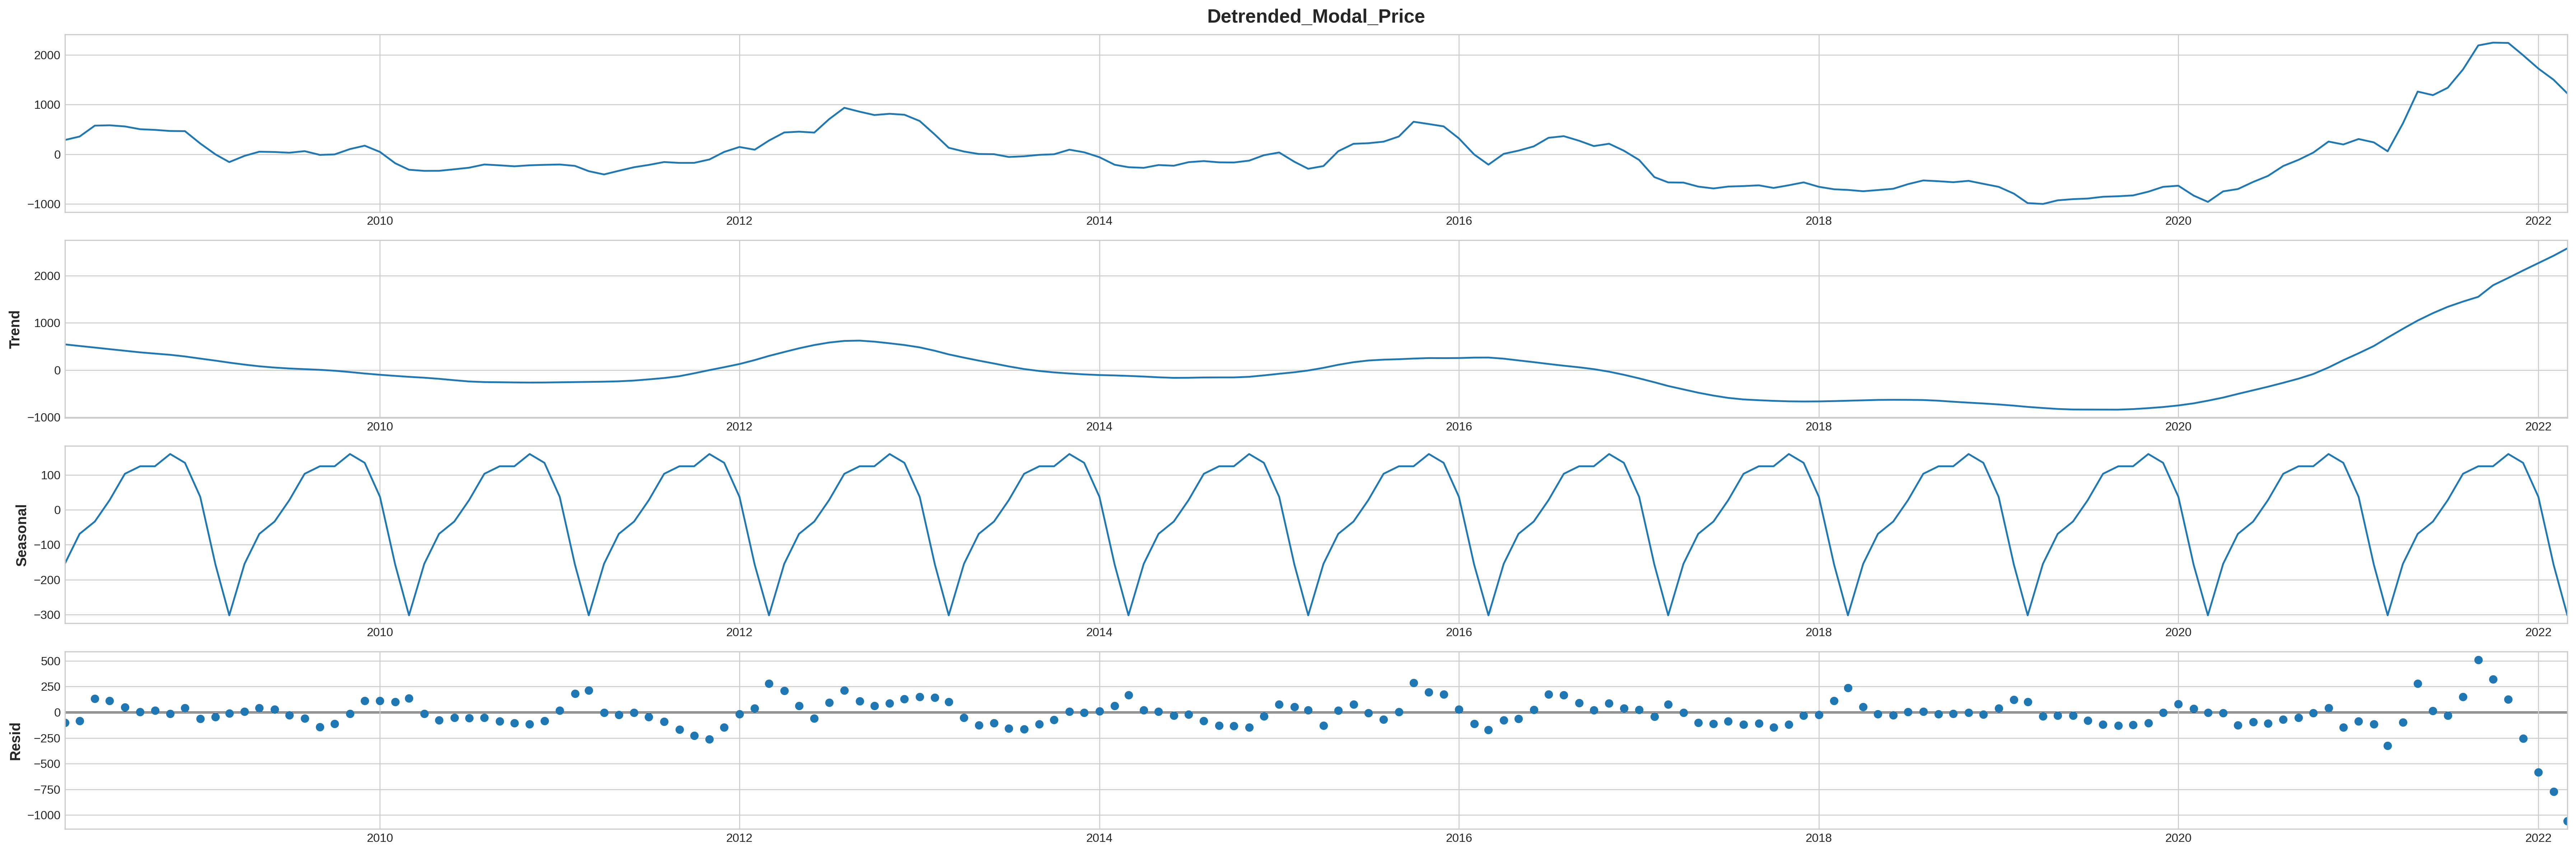

In [50]:
seasonal_decompose_add(CropData_Summarized.set_index('Yr-mon')['Detrended_Modal_Price'])

#### Logged Transformation Detrending


In [51]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=CropData_Summarized['Yr-mon'], 
    y=CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'].apply(lambda x : np.log(x)),
    mode='lines' ,
    name = "Logged Transformation  - Detrending"
))


fig.add_trace(go.Scatter(
    x=CropData_Summarized['Yr-mon'], 
    y=CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'],
    mode='lines' ,
    name = "Original Values"
))


fig.show()

#### Power Transformations

In [52]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=CropData_Summarized['Yr-mon'], 
    y=CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'].apply(lambda x : x ** 0.5),
    mode='lines' ,
    name = "Power Transformation  - Detrending"
))


fig.add_trace(go.Scatter(
    x=CropData_Summarized['Yr-mon'], 
    y=CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'],
    mode='lines' ,
    name = "Original Values"
))


fig.show()

##### Differencing

In [53]:
CropData_Summarized

Yr-mon  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0   2008-04-01            1972.00963608            2205.36717374   
1   2008-05-01            2064.28117098            2281.46805096   
2   2008-06-01            2275.34649658            2465.06094360   
3   2008-07-01            2256.71813305            2478.50493562   
4   2008-08-01            2326.43164150            2486.02664823   
..         ...                      ...                      ...   
163 2021-11-01            7147.13177975            7425.54588575   
164 2021-12-01            6895.51661041            7190.09539883   
165 2022-01-01            6612.20622497            6959.09646888   
166 2022-02-01            6275.08746048            6867.76049977   
167 2022-03-01            6079.68015073            6590.31078909   

     Modal Price (Rs./Quintal)  Year  Month  Detrended_Modal_Price  
0                2245.05707396  2008      4           286.43939745  
1                2334.04088310  2008      5           356.25196684  
2                2572.88038574  2008      6           575.92022974  
3                2598.77682403  2008      7           582.64542828  
4                2595.23441471  2008      8           559.93177921  
..                         ...   ...    ...                    ...  
163              7324.34058569  2021     11          2240.81083053  
164              7096.49395985  2021     12          1993.79296495  
165              6847.17965053  2022      1          1725.30741588  
166              6640.37024688  2022      2          1499.32677248  
167              6384.37422698  2022      3          1224.15951283  

[168 rows x 7 columns]

In [54]:
test_stationarity(
    Modal_Detrended-Modal_Detrended.shift(12) , 'Modal Detrended + Differenced'
)

ADF_test(
    Modal_Detrended-Modal_Detrended.shift(12) , 'Modal Detrended + Differenced'
)

 > Is the Modal Detrended + Differenced stationary ?
(-3.3515400488628644, 0.012726059063775025, 13, 131, {'1%': -3.481281802271349, '5%': -2.883867891664528, '10%': -2.5786771965503177}, 182.2920183532589) 

Lag : 13
Test statistic = -3.352
P-value = 0.013
Critical values :
	1%: -3.481281802271349 - The data is not stationary with 99% confidence
	5%: -2.883867891664528 - The data is  stationary with 95% confidence
	10%: -2.5786771965503177 - The data is  stationary with 90% confidence

 (-2.81967491220109, 0.05551784214006829, 12, 132, {'1%': -3.4808880719210005, '5%': -2.8836966192225284, '10%': -2.5785857598714417}, 196.14728949948295) 

Lag : 12
Test statistic = -2.820
P-value = 0.056
Critical values :
	1%: -3.4808880719210005 - The data is not stationary with 99% confidence
	5%: -2.8836966192225284 - The data is not stationary with 95% confidence
	10%: -2.5785857598714417 - The data is  stationary with 90% confidence
